# Breast Cancer Project

## Loading Libraries

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

## Loading & Preview Dataset

In [4]:
df = pd.read_csv("./cancer_data.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [13]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

df.describe(include="all")

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080


### Null Data

In [9]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

### Dropping usless Columns

In [11]:
df = df.drop(["id", "Unnamed: 32"], axis=1)

### Drop duplicates

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.describe(include="all")

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080


## Verifying If DF is Balanced

In [16]:
y = df["diagnosis"]
X = df.drop("diagnosis", axis=1)

/home/argarcia/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


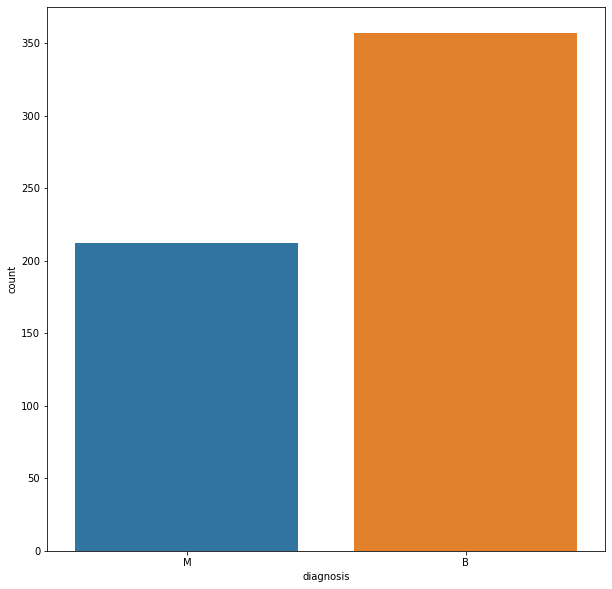

In [18]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,10))
sns.countplot(y )
plt.show()

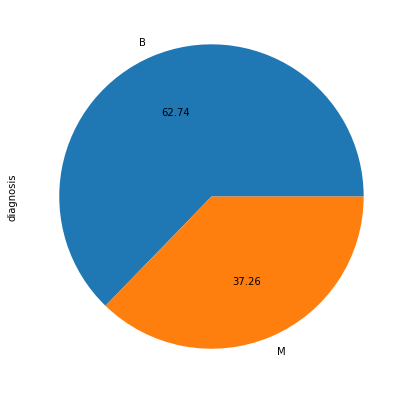

In [19]:
fig = plt.figure(figsize=(7,7))
y.value_counts().plot.pie(autopct='%.2f')
plt.show()

## Under-sampling

In [20]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(random_state=42)

In [23]:
X_under, y_under = undersample.fit_resample(X, y)
y_under.value_counts()


B    212
M    212
Name: diagnosis, dtype: int64

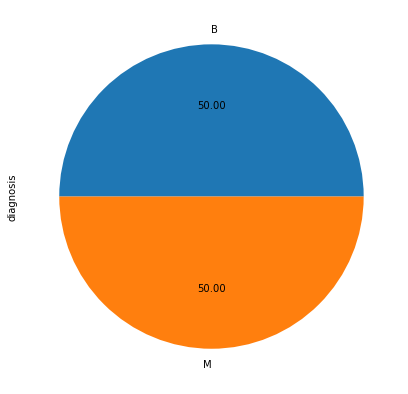

In [22]:
fig = plt.figure(figsize=(7,7))
y_under.value_counts().plot.pie(autopct='%.2f')
plt.show()

## Changing Y to numeric

In [24]:
y_under.unique()

array(['B', 'M'], dtype=object)

In [27]:
y_under = y_under.replace(["B", "M"], [0,1])

In [28]:
y_under.unique()

array([0, 1])

## EDA

### Correlations

In [29]:
df_2 = X_under.copy(deep=True)
df_2["diagnosis"] = y_under

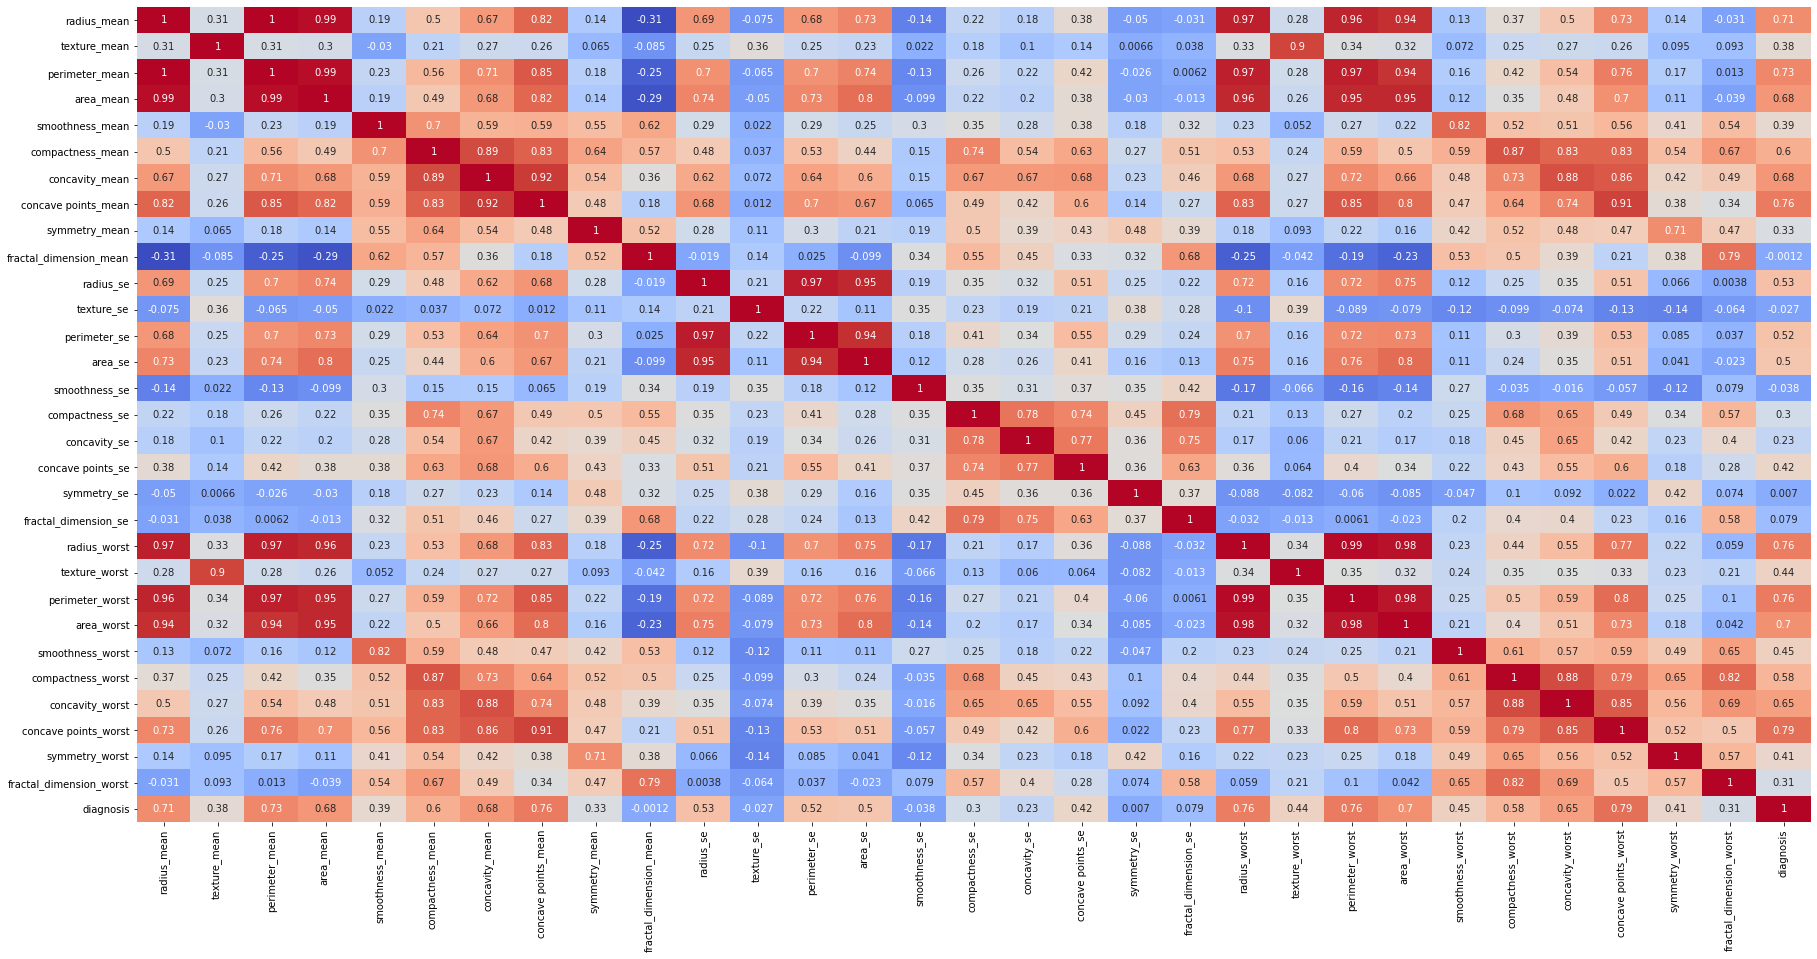

In [31]:
plt.figure(figsize=(30,15))
sns.heatmap(df_2.corr(), annot= True, cmap='coolwarm',cbar=False)
plt.show()

In [32]:
X_under.drop(['perimeter_mean','area_mean', 'radius_mean'], axis=1, inplace=True) # they present multicolinearity

## Data Viz

In [34]:
# sns.pairplot(df_2, hue='diagnosis')

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# En 6ta instancia 1ra parte, se escalarán los datos para luego comprobar la multicolinealidad entre las variables con vif (variance inflation factor)
st_x = StandardScaler()

df_scaled = st_x.fit_transform(X_under)
cols = [cname for cname in X_under.columns if X_under[cname].dtype in ['int64', 'float64']]
df_scaled = pd.DataFrame(df_scaled, columns=cols)
df_scaled.head()


,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.648325,-1.206428,-1.045182,-0.902870,-0.586276,-0.704178,-0.701649,-0.984751,0.824775,-0.873128,...,-0.464178,-0.216327,-0.504855,-0.502968,-1.193472,-0.923394,-1.024370,-0.723335,-0.668489,-1.007282
1,-0.692634,0.450544,-0.498541,-0.707616,-0.944330,-0.908171,1.106354,-0.151921,0.355588,-0.193292,...,-1.223589,-0.850696,-1.202748,-1.020480,0.528378,-0.605301,-0.816624,-1.101772,-0.653294,-0.046004
2,-0.167924,-1.244912,-1.051470,-0.865780,-0.873352,-0.926065,-0.937898,-0.387329,-0.538923,-0.504396,...,-0.171796,-0.039294,-0.279747,-0.264995,-1.202059,-0.813789,-0.645942,-0.688238,-0.922243,-0.493291
3,-1.662765,-1.686059,-1.281946,-1.134825,-1.097227,-0.804385,-0.355613,-0.400517,0.467043,-0.480984,...,-0.803656,-1.688325,-0.876651,-0.748277,-1.717755,-1.270853,-1.334892,-1.491516,-1.037724,-0.790620
4,-0.767260,0.550319,-0.913327,-0.795262,-0.744520,-1.784985,-0.450113,-0.000588,2.304242,0.036772,...,-0.776184,-0.193379,-0.794281,-0.727576,-0.313224,-1.044316,-0.932852,-0.861816,-1.900793,-0.627735


In [43]:
X_data = pd.DataFrame()
X_data['Feature'] = X_under.columns

X_data['VIF']= [variance_inflation_factor(df_scaled.values, i) for i in range(len(X_under.columns))]
print(X_data)
print(list(X_data['Feature']))

                    Feature         VIF
0              texture_mean   10.600571
1           smoothness_mean    8.771891
2          compactness_mean   35.753447
3            concavity_mean   71.311486
4       concave points_mean   61.880151
5             symmetry_mean    4.377837
6    fractal_dimension_mean   16.789021
7                 radius_se   56.520194
8                texture_se    3.798844
9              perimeter_se   68.349138
10                  area_se   29.897477
11            smoothness_se    3.404346
12           compactness_se   14.691963
13             concavity_se   15.948680
14        concave points_se   10.699979
15              symmetry_se    5.166206
16     fractal_dimension_se   10.191521
17             radius_worst  307.552252
18            texture_worst   16.340883
19          perimeter_worst  317.517304
20               area_worst   85.008318
21         smoothness_worst   10.810926
22        compactness_worst   34.788436
23          concavity_worst   31.065729


Como se puede ver anteriormente hay ciertas variables con un factor de varianza inflada muy grande lo que supone, primeramente, un overfitting del modelo que se puede utilizar y, segundo, sensibilidad que puede llegar a tener el modelo, por tanto se optará por eliminar las variables que influyen al factor de varianza inflada
Cabe aclarar que el valor de VIF debe de estar entre 1 y 5, no ahondaré en el tema pero pueden leer más aquí
En 7ma instancia, se hace drop de las variables con un VIF mayor a 5 y se recalcula el VIF para ver cómo fueron afectadas las demás variables (esto depende mucho del dataset y las variables implicadas, este es un ejemplo ilustrativo)

In [44]:
X_vif = df_scaled.drop(['radius_worst','perimeter_worst', 'texture_mean','fractal_dimension_mean','texture_worst','compactness_worst','compactness_mean','concavity_mean','concave points_mean','radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se','concave points_worst'], axis = 1)

In [45]:
X_data = pd.DataFrame()
X_data['Feature'] = X_vif.columns

X_data['VIF']= [variance_inflation_factor(X_vif.values, i) for i in range(len(X_vif.columns))]
print(X_data)

                   Feature       VIF
0          smoothness_mean  3.933058
1            symmetry_mean  2.692022
2               area_worst  1.837934
3         smoothness_worst  4.202779
4          concavity_worst  3.621081
5           symmetry_worst  2.710057
6  fractal_dimension_worst  3.218938


In [47]:
X_vif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   smoothness_mean          424 non-null    float64
 1   symmetry_mean            424 non-null    float64
 2   area_worst               424 non-null    float64
 3   smoothness_worst         424 non-null    float64
 4   concavity_worst          424 non-null    float64
 5   symmetry_worst           424 non-null    float64
 6   fractal_dimension_worst  424 non-null    float64
dtypes: float64(7)
memory usage: 23.3 KB


Como se puede ver anteriormente, se eliminaron las variables que tenían un alto valor de factor de varianza inflada. Ya conociendo esto, se procederá a hacer el split entre entrenamiento y test del dataframe con las features que quedaron
En 8va instancia, se define la función ‘logistic_model’ con parámetros de entrada ‘C_’, ‘solver_’, ‘multiclass_’, como se vio en clase, después se procede a hacer el split entre entrenamiento y test, y finalmente se entrena con diferentes solvers y multiclass (en este caso sólo es una regresión logística binomial entonces no es necesario la multiclase pero aún así se entrena por motivos ilustrativos)

## Splitting & Sacaling

In [48]:
X_train, X_test, y_train , y_test = train_test_split(X_vif, y_under, random_state=42, shuffle=True, test_size= .2)

In [49]:
st_x = StandardScaler()
X_train = st_x.fit_transform(X_train) 
X_test = st_x.transform(X_test) # solo se transforma para que no se lleve info del training al test

## Model

In [50]:
def logistic_model(C_,solver_ , multiclass_):
    logistic_regression_model = LogisticRegression(random_state=42, solver= solver_, multi_class= multiclass_, n_jobs=-1, C=C_ , max_iter=500)
    return logistic_regression_model

In [51]:
multiclass = ['ovr','multinomial']
solver_list = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
scores = []
params=[]
for i in multiclass:
    for j in solver_list:
        try:
            model = logistic_model(1,j,i)
            model.fit(X_train, y_train)
            predictions = model.predict(X_test)
            params.append(i + '-'+ j)
            accuraccy = f1_score(y_test,predictions, average="weighted")
            scores.append(accuraccy)
        except:
            None    

/home/argarcia/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


## Model Evaluation

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'ovr-liblinear'),
  Text(1, 0, 'ovr-newton-cg'),
  Text(2, 0, 'ovr-lbfgs'),
  Text(3, 0, 'ovr-sag'),
  Text(4, 0, 'ovr-saga'),
  Text(5, 0, 'multinomial-newton-cg'),
  Text(6, 0, 'multinomial-lbfgs'),
  Text(7, 0, 'multinomial-sag'),
  Text(8, 0, 'multinomial-saga')])

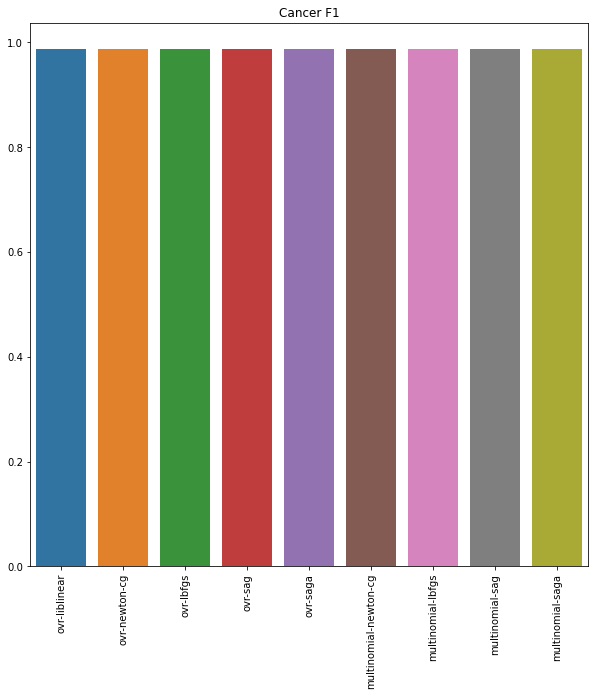

In [55]:
fig = plt.figure(figsize=(10,10))
sns.barplot(x=params, y=scores).set_title('Cancer F1')
plt.xticks(rotation=90)

In [54]:
model = logistic_model(1,'newton-cg','multinomial')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(f1_score(y_test,predictions, average="weighted"))

report = classification_report(y_test, predictions)
print(report)

[[45  1]
 [ 0 39]]
0.9882451130403476
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        46
           1       0.97      1.00      0.99        39

    accuracy                           0.99        85
   macro avg       0.99      0.99      0.99        85
weighted avg       0.99      0.99      0.99        85

